# Отчет по выполнению лабораторной работы 3.5.1



## *"Изучение плазмы газового разряда в неоне"*

In [168]:
#Импортирование библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from sklearn.metrics import mean_squared_error
from IPython.display import Image 

#%matplotlib inline

## Установка

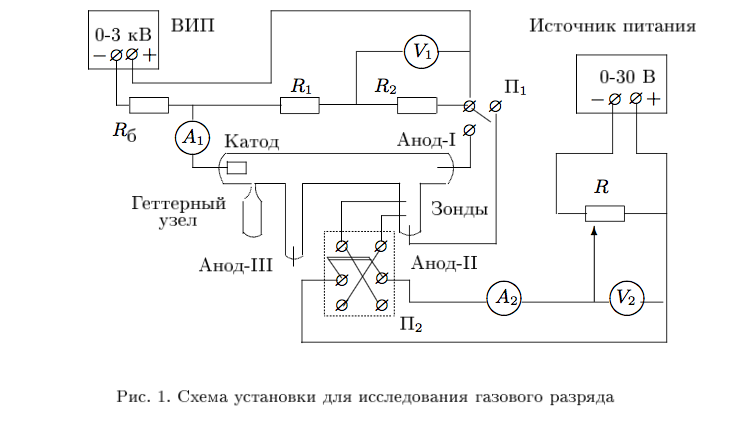

In [169]:
Image(filename='/Users/yaroslavtominin/Desktop/Снимок экрана 2018-09-08 в 12.46.08.png')

In [170]:
def mnkGP(x,y):
    d = 1 # степень полинома
    fp, residuals, rank, sv, rcond = sp.polyfit(x, y, d, full=True) # Модель
    f = sp.poly1d(fp) # аппроксимирующая функция
    y1=[fp[0]*x[i]+fp[1] for i in range(0,len(x))] # значения функции a*x+b
    so=round(sum([abs(y[i]-y1[i]) for i in range(0,len(x))])/(len(x)*sum(y))*100,4) # средняя ошибка
    fx = sp.linspace(x[0], x[-1] + 1, len(x)) # можно установить вместо len(x) большее число для интерполяции
    #print(len(x))
    #print(y[0]-y[len(x)-1])
    #print(x[0]-x1[0])
    #print((x[0]-x[len(x)-1]))
    #mse=(y[0]-y1[0])/(y[0]-y[len(x)-1])#+(y[0]-y[len(x)-1])*(x[0]-x1[0])/((x[0]-x[len(x)-1])**2)
    #plt.plot(x, y, 'o', label='Original data', markersize=10)
    #plt.plot(fx, f(fx))
    #plt.grid(True)
    #plt.ylabel('I')
    #plt.xlabel('U')
    #plt.title(f'$I_p$ = {round(fp[1],3)} mA')
    #plt.show()
    return fp[0], fp[1]


### Измерим напряжение пробоя

In [171]:
pd.DataFrame({'V,B':[205,193,197,198,208]})

,"V,B"
0,205
1,193
2,197
3,198
4,208


In [172]:
pd.DataFrame({'V,B':[205,193,197,198,208]})
U_pr = np.array([205,193,197,198])
U_mean = U_pr.mean()
MSE = mean_squared_error(U_pr, [U_mean]*len(U_pr))
print(f"U = {U_mean} +- {MSE} Volt")

U = 198.25 +- 18.6875 Volt


## Таблица снятия показаний вольтметра $V_1$ и амперметра $А_1$. 

#### Ток разряда в диапазоне от 0.5 мА до 5мА

In [173]:
#Увеличение тока от 0.5 мА до 5 мА
I_1 = np.array([22,33,48,69,84,96,119,140])
I_1 = I_1*1.5/(150*10**3)
I_2 = np.array([39,45,55,62,75,85,93,99,109,122])
I_2 = I_2 *6/(150*10**3)
U = np.array([36.3, 35.7,35.2,34.5,34.1,33.8,33.0, 32.5,32.2,32, 31.7, 31.5, 31.3, 31.5, 31.6,31.6,31.7,31.7])*10
Colum1_1=np.array(['Прямо' for i in range(0,18)])
Colum2_1=np.hstack((np.array([1.5 for i in range(0,8)]),np.array([6 for i in range(0,10)])))
Colum3_1=np.hstack((np.array([22,33,48,69,84,96,119,140]),np.array([39,45,55,62,75,85,93,99,109,122])))
Colum4_1=np.hstack((I_1,I_2))
Colum5_1=np.hstack((np.array([1.5/(150*10**3) for i in range(0,8)]), np.array([6.0/(150*10**3) for i in range(0,10)])))
Colum7_1=0.002*U
d1={'Прямо или обратно':Colum1_1,'Предел':Colum2_1,
   'Количество делений':Colum3_1,'I, мА':Colum4_1*10**3,' ∆I, мА':Colum5_1*10**3,'U, В':U,'∆U, В':Colum7_1}
pd.DataFrame(d1)

,Прямо или обратно,Предел,Количество делений,"I, мА","∆I, мА","U, В","∆U, В"
0,Прямо,1.5,22,0.22,0.01,363.0,0.726
1,Прямо,1.5,33,0.33,0.01,357.0,0.714
2,Прямо,1.5,48,0.48,0.01,352.0,0.704
3,Прямо,1.5,69,0.69,0.01,345.0,0.690
4,Прямо,1.5,84,0.84,0.01,341.0,0.682
5,Прямо,1.5,96,0.96,0.01,338.0,0.676
6,Прямо,1.5,119,1.19,0.01,330.0,0.660
7,Прямо,1.5,140,1.40,0.01,325.0,0.650
8,Прямо,6.0,39,1.56,0.04,322.0,0.644
9,Прямо,6.0,45,1.80,0.04,320.0,0.640


In [174]:
##Уменьшение тока от 5 мА до 0.5 мА
I_1_1 = np.array([23,32,41,50,60,73,83,90,102,110,119,128])
I_1_1 = I_1_1*1.5/(150*10**3)
I_2_1 = np.array([38,45,50,55,60,65,70,75,80,85,90,95,100,105,110,115,120,125,130])
I_2_1 = I_2_1 *6/(150*10**3)
U_1 = np.array([36.32,35.95,35.46,35.24,34.90,34.38,34.13,33.95,33.60,33.17,32.66,32.34,31.78,31.38,31.22,30.99,30.91,30.82,30.75,30.57,30.53,30.68,30.78,30.84,30.87,30.91,30.95,30.97,30.97,30.96,30.97])*10
Colum1_1_1=np.array(['Обратно' for i in range(0,31)])
Colum2_1_1=np.hstack((np.array([1.5 for i in range(0,12)]),np.array([6 for i in range(0,19)])))
Colum3_1_1=np.hstack((np.array(I_1_1*150/1.5),np.array(I_2_1*150/6)))
Colum4_1_1=np.hstack((I_1_1,I_2_1))
Colum5_1_1=np.hstack((np.array([1.5/(150*10**3) for i in range(0,12)]), np.array([6.0/(150*10**3) for i in range(0,19)])))
Colum7_1_1=0.002*U_1
d1_1={'Прямо или обратно':Colum1_1_1,'Предел':Colum2_1_1,
   'Количество делений':Colum3_1_1,'I, мА':Colum4_1_1*10**3,' ∆I, мА':Colum5_1_1*10**3,'U, В':U_1,'∆U, В':Colum7_1_1}
pd.DataFrame(d1_1)

,Прямо или обратно,Предел,Количество делений,"I, мА","∆I, мА","U, В","∆U, В"
0,Обратно,1.5,0.023,0.23,0.01,363.2,0.7264
1,Обратно,1.5,0.032,0.32,0.01,359.5,0.7190
2,Обратно,1.5,0.041,0.41,0.01,354.6,0.7092
3,Обратно,1.5,0.050,0.50,0.01,352.4,0.7048
4,Обратно,1.5,0.060,0.60,0.01,349.0,0.6980
5,Обратно,1.5,0.073,0.73,0.01,343.8,0.6876
6,Обратно,1.5,0.083,0.83,0.01,341.3,0.6826
7,Обратно,1.5,0.090,0.90,0.01,339.5,0.6790
8,Обратно,1.5,0.102,1.02,0.01,336.0,0.6720
9,Обратно,1.5,0.110,1.10,0.01,331.7,0.6634


## Зондовые характеристики

### Таблица снятия тока и напяжения через двойной зонд при разрядном токе 5 мА

In [175]:
I_plus = np.array([4.51,11.20,24.74,37.08, 49.23, 60.64, 72.89,89.81,101.71,115.96,124.52,128.40,129.71, 128.18])
U_plus = np.array([0.55, 1.04, 2.05,3.01, 4.00,5.02,6.22,8.20,9.97,12.97,16.10,18.99, 22.02,24.97])
I_min = np.array(list(reversed([3.05, 5.72,13.28,27.05, 38.99,61.06, 76.43,89.01,99.73,108.38,112.39,114.02,112.36])))
U_min = np.array(list(reversed([0.728,1.378,1.950,3.029,4.022,6.135,7.970,9.902,12.180,15.126,18.027,21.515,24.985])))
Colum4_2=np.hstack((-I_min,I_plus))
Colum5_2=0.002*Colum4_2
Colum6_2=np.hstack((-U_min,U_plus))
Colum7_2=0.002*Colum6_2
d2_1={'I, мкА':Colum4_2,' ∆I, мкА':Colum5_2,'U, В':Colum6_2,'∆U, В':Colum7_2}
pd.DataFrame(d2_1)

,"I, мкА","∆I, мкА","U, В","∆U, В"
0,-112.36,-0.22472,-24.985,-0.049970
1,-114.02,-0.22804,-21.515,-0.043030
2,-112.39,-0.22478,-18.027,-0.036054
3,-108.38,-0.21676,-15.126,-0.030252
4,-99.73,-0.19946,-12.180,-0.024360
5,-89.01,-0.17802,-9.902,-0.019804
6,-76.43,-0.15286,-7.970,-0.015940
7,-61.06,-0.12212,-6.135,-0.012270
8,-38.99,-0.07798,-4.022,-0.008044
9,-27.05,-0.05410,-3.029,-0.006058


### Таблица снятия тока и напряжения через двойной зонд при разрядном токе 3 мА

In [176]:
I_plus_2 = np.array([6.87,14.16,19.43,25.40,37.14,45.80,55.31,62.26,69.77,73.88,76.29,78.56,80.80])
U_plus_2 = np.array([0.660,1.563,2.228,3.012,4.678,6.106,8.033,9.907,13.041,16.189,19.021,22.006,24.995])
I_min_2 = np.array(list(reversed([0.36,4.55,10.65,13.23,19.72,26.63,37.38,47.05,54.10,60.5,63.57,65.72,67.87,69.79])))
U_min_2 = np.array(list(reversed([0.65,1.186,2.304,1.966,3.185,4.197,5.961,8.042,10.162,13.078,16.159,18.971,22.141,24.995])))
Colum4_2_2=np.hstack((-I_min_2, I_plus_2))
Colum5_2_2=0.002*Colum4_2_2
Colum6_2_2=Colum4_2=np.hstack((-U_min_2, U_plus_2))
Colum7_2_2=0.002*Colum6_2_2
d2_2={'I, мкА':Colum4_2_2,' ∆I, мкА':Colum5_2_2,'U, В':Colum6_2_2,'∆U, В':Colum7_2_2}

pd.DataFrame(d2_2)

,"I, мкА","∆I, мкА","U, В","∆U, В"
0,-69.79,-0.13958,-24.995,-0.049990
1,-67.87,-0.13574,-22.141,-0.044282
2,-65.72,-0.13144,-18.971,-0.037942
3,-63.57,-0.12714,-16.159,-0.032318
4,-60.50,-0.12100,-13.078,-0.026156
5,-54.10,-0.10820,-10.162,-0.020324
6,-47.05,-0.09410,-8.042,-0.016084
7,-37.38,-0.07476,-5.961,-0.011922
8,-26.63,-0.05326,-4.197,-0.008394
9,-19.72,-0.03944,-3.185,-0.006370


### Таблица снятия тока и напряжения через двойной зонд при разрядном токе 1.5 мА

In [177]:
I_plus_3 = np.array([3.90, 7.48,10.31,14.82,17.87,24.57,29.46,32.51,35.78,37.48,38.87,40.38,41.69])
U_plus_3 = np.array([0.56, 1.387,2.05,3.19,4.00,6.13,8.219,10.091,13.196,16.092,19.025,22.312,24.978])
I_min_3 = np.array(list(reversed([0, 3.38, 7.39,10.42,14.10, 20.01, 24.20, 27.01,30.02, 31.41, 32.58, 33.63, 34.81])))
U_min_3 = np.array(list(reversed([0.48,1.280, 2.263, 3.050, 4.089, 6.099, 8.056, 9.944, 13.400, 16.325, 19.269, 21.962, 24.977])))
Colum4_2_3=np.hstack((-I_min_3, I_plus_3))
Colum5_2_3=0.002*Colum4_2_3
Colum6_2_3=Colum4_2=np.hstack((-U_min_3,U_plus_3))
Colum7_2_3=0.002*Colum6_2_3
d2_3={'I, мкА':Colum4_2_3,'∆I, мкА':Colum5_2_3,'U, В':Colum6_2_3,'∆U, В':Colum7_2_3}
pd.DataFrame(d2_3)

,"I, мкА","∆I, мкА","U, В","∆U, В"
0,-34.81,-0.06962,-24.977,-0.049954
1,-33.63,-0.06726,-21.962,-0.043924
2,-32.58,-0.06516,-19.269,-0.038538
3,-31.41,-0.06282,-16.325,-0.032650
4,-30.02,-0.06004,-13.400,-0.026800
5,-27.01,-0.05402,-9.944,-0.019888
6,-24.20,-0.04840,-8.056,-0.016112
7,-20.01,-0.04002,-6.099,-0.012198
8,-14.10,-0.02820,-4.089,-0.008178
9,-10.42,-0.02084,-3.050,-0.006100


## Обработка результатов

### Построение вольт-амперной характеристики разряда

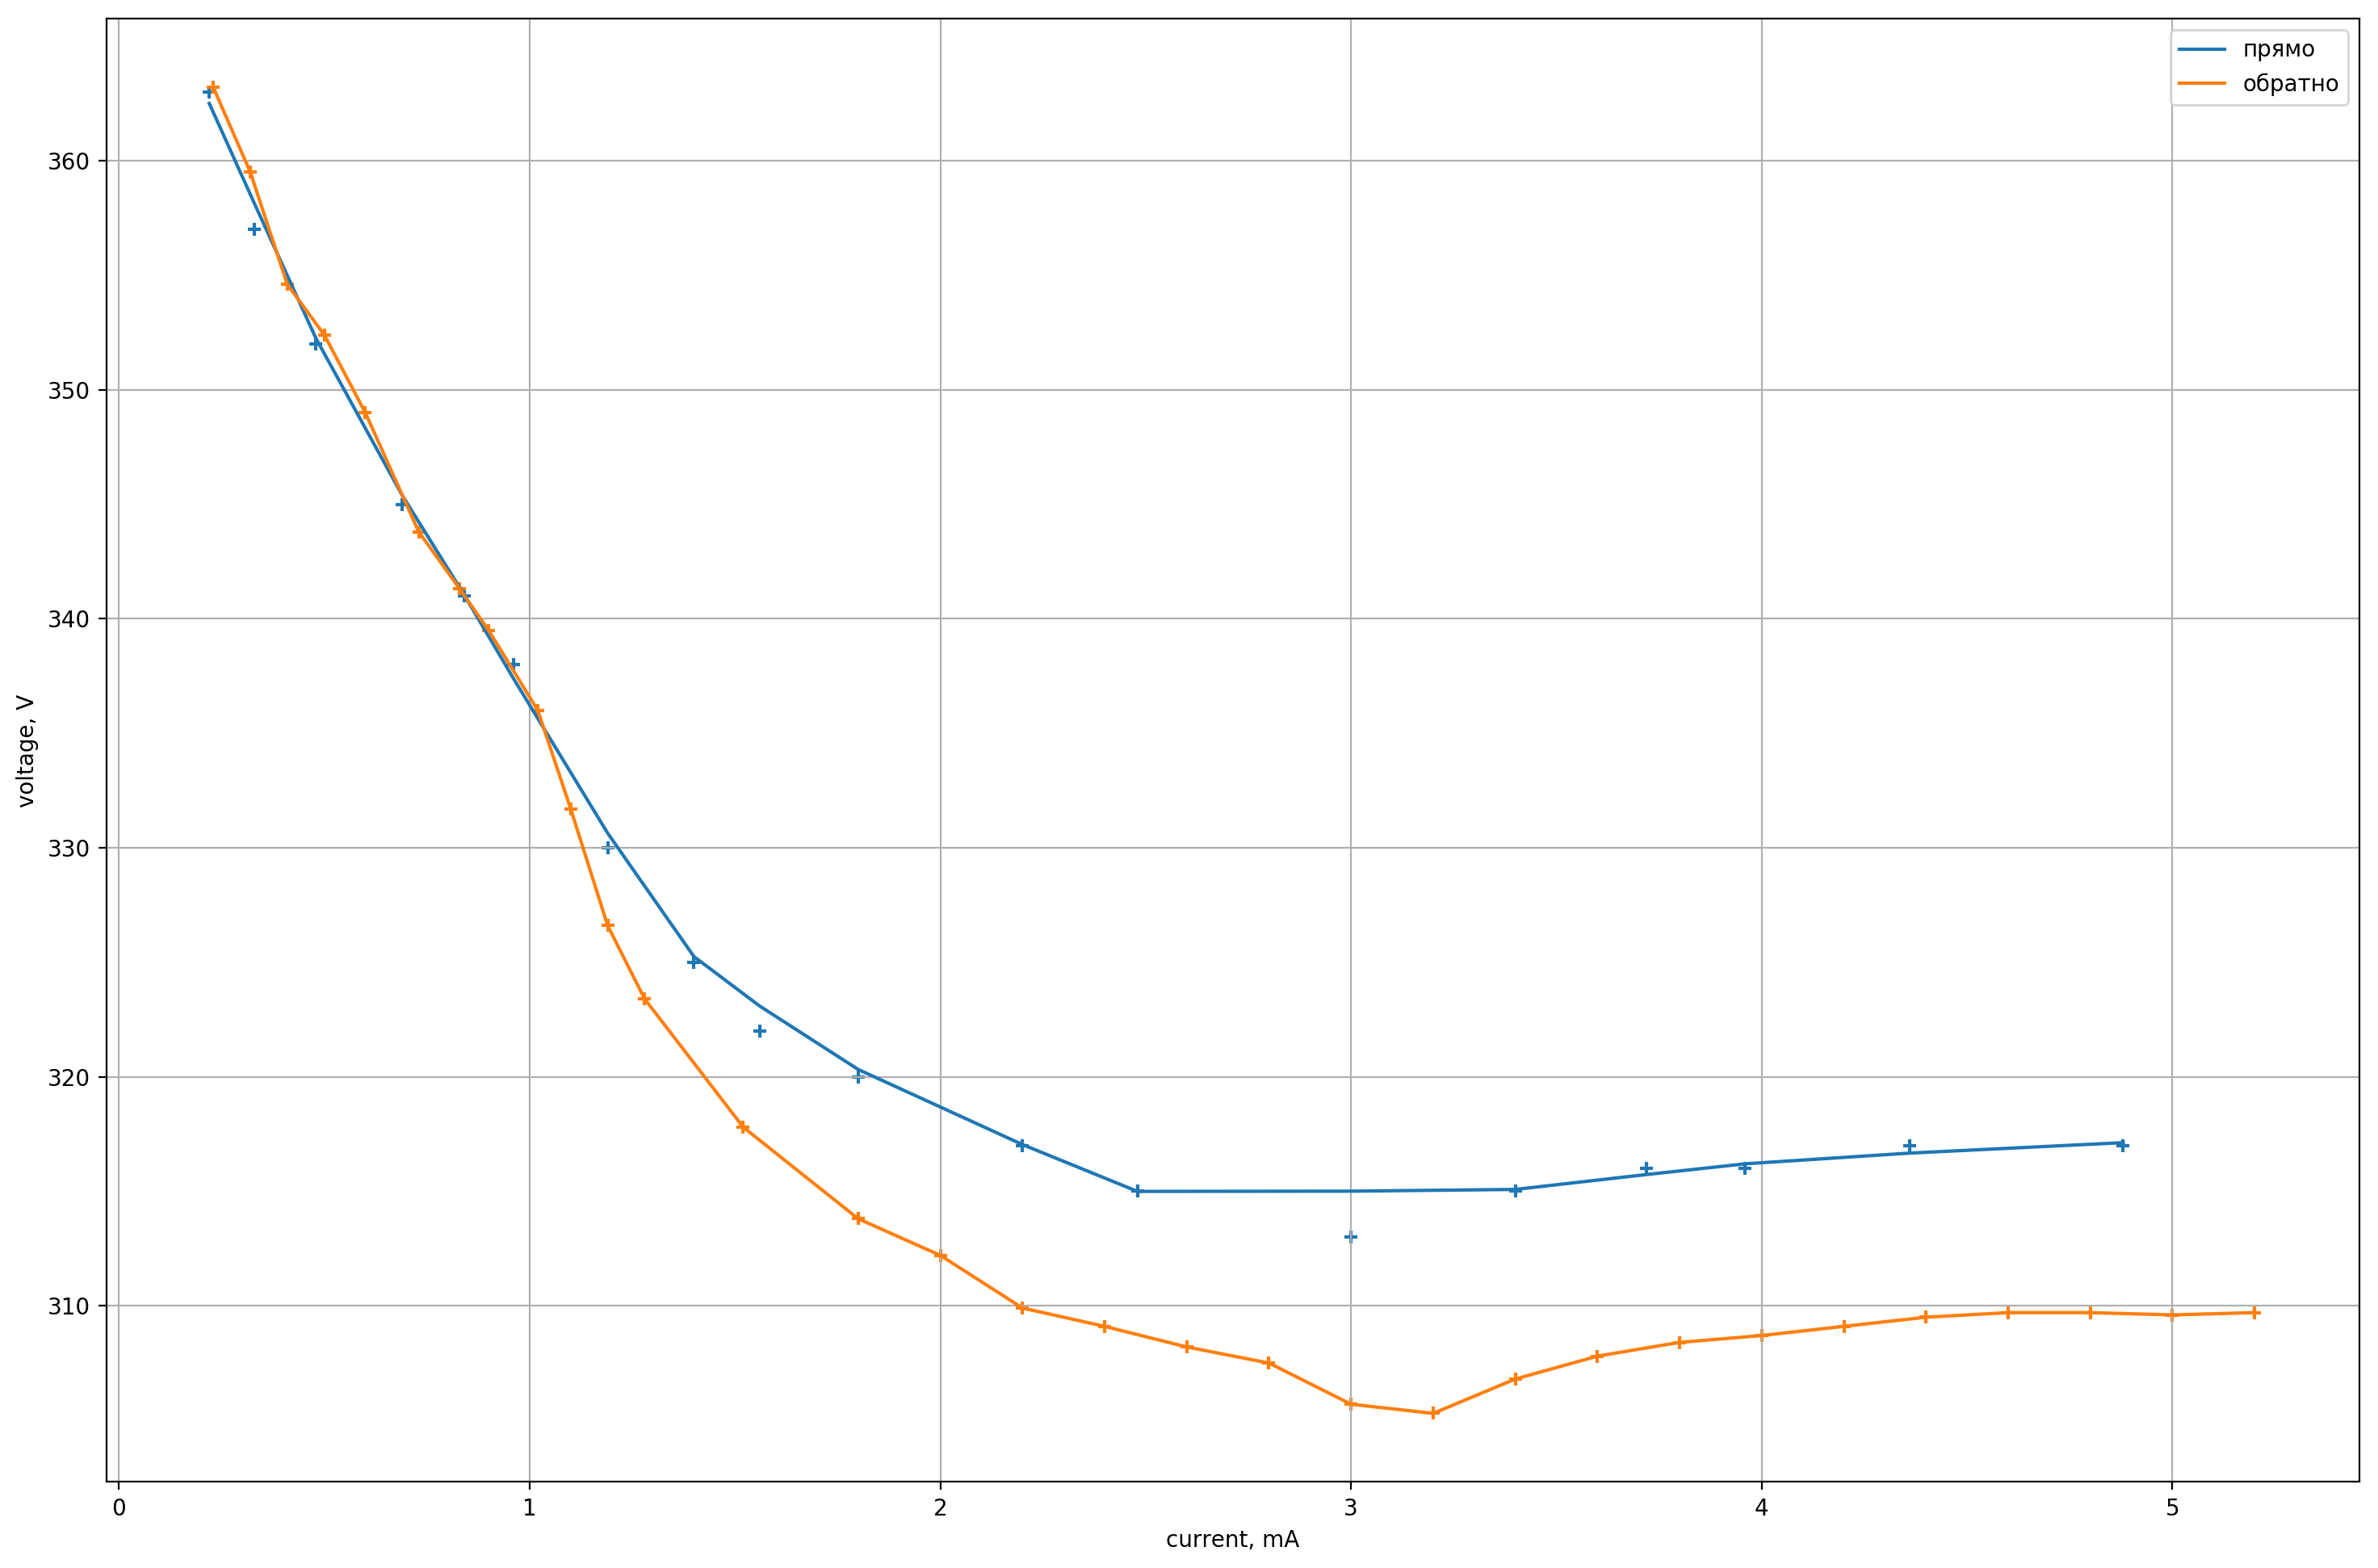

In [210]:
#import pylab as plt
import statsmodels.api as sm


x = d1['I, мА']
y = d1['U, В']
x_1 = d1_1['I, мА']
y_1 = d1_1['U, В']
plt.figure(figsize=(18,12),dpi=200)
lowess = sm.nonparametric.lowess(y, x, frac=0.3)
plt.scatter(x, y, marker='+')
plt.plot(lowess[:,0], lowess[:,1], label = "прямо")
plt.scatter(x_1, y_1, marker='+')
plt.plot(x_1, y_1, label = 'обратно')
plt.ylabel("voltage, V")
plt.xlabel("current, mA")
plt.legend()
#plt.scatter(lowess[:, 0], lowess[:, 1])
plt.grid(True)
plt.show()

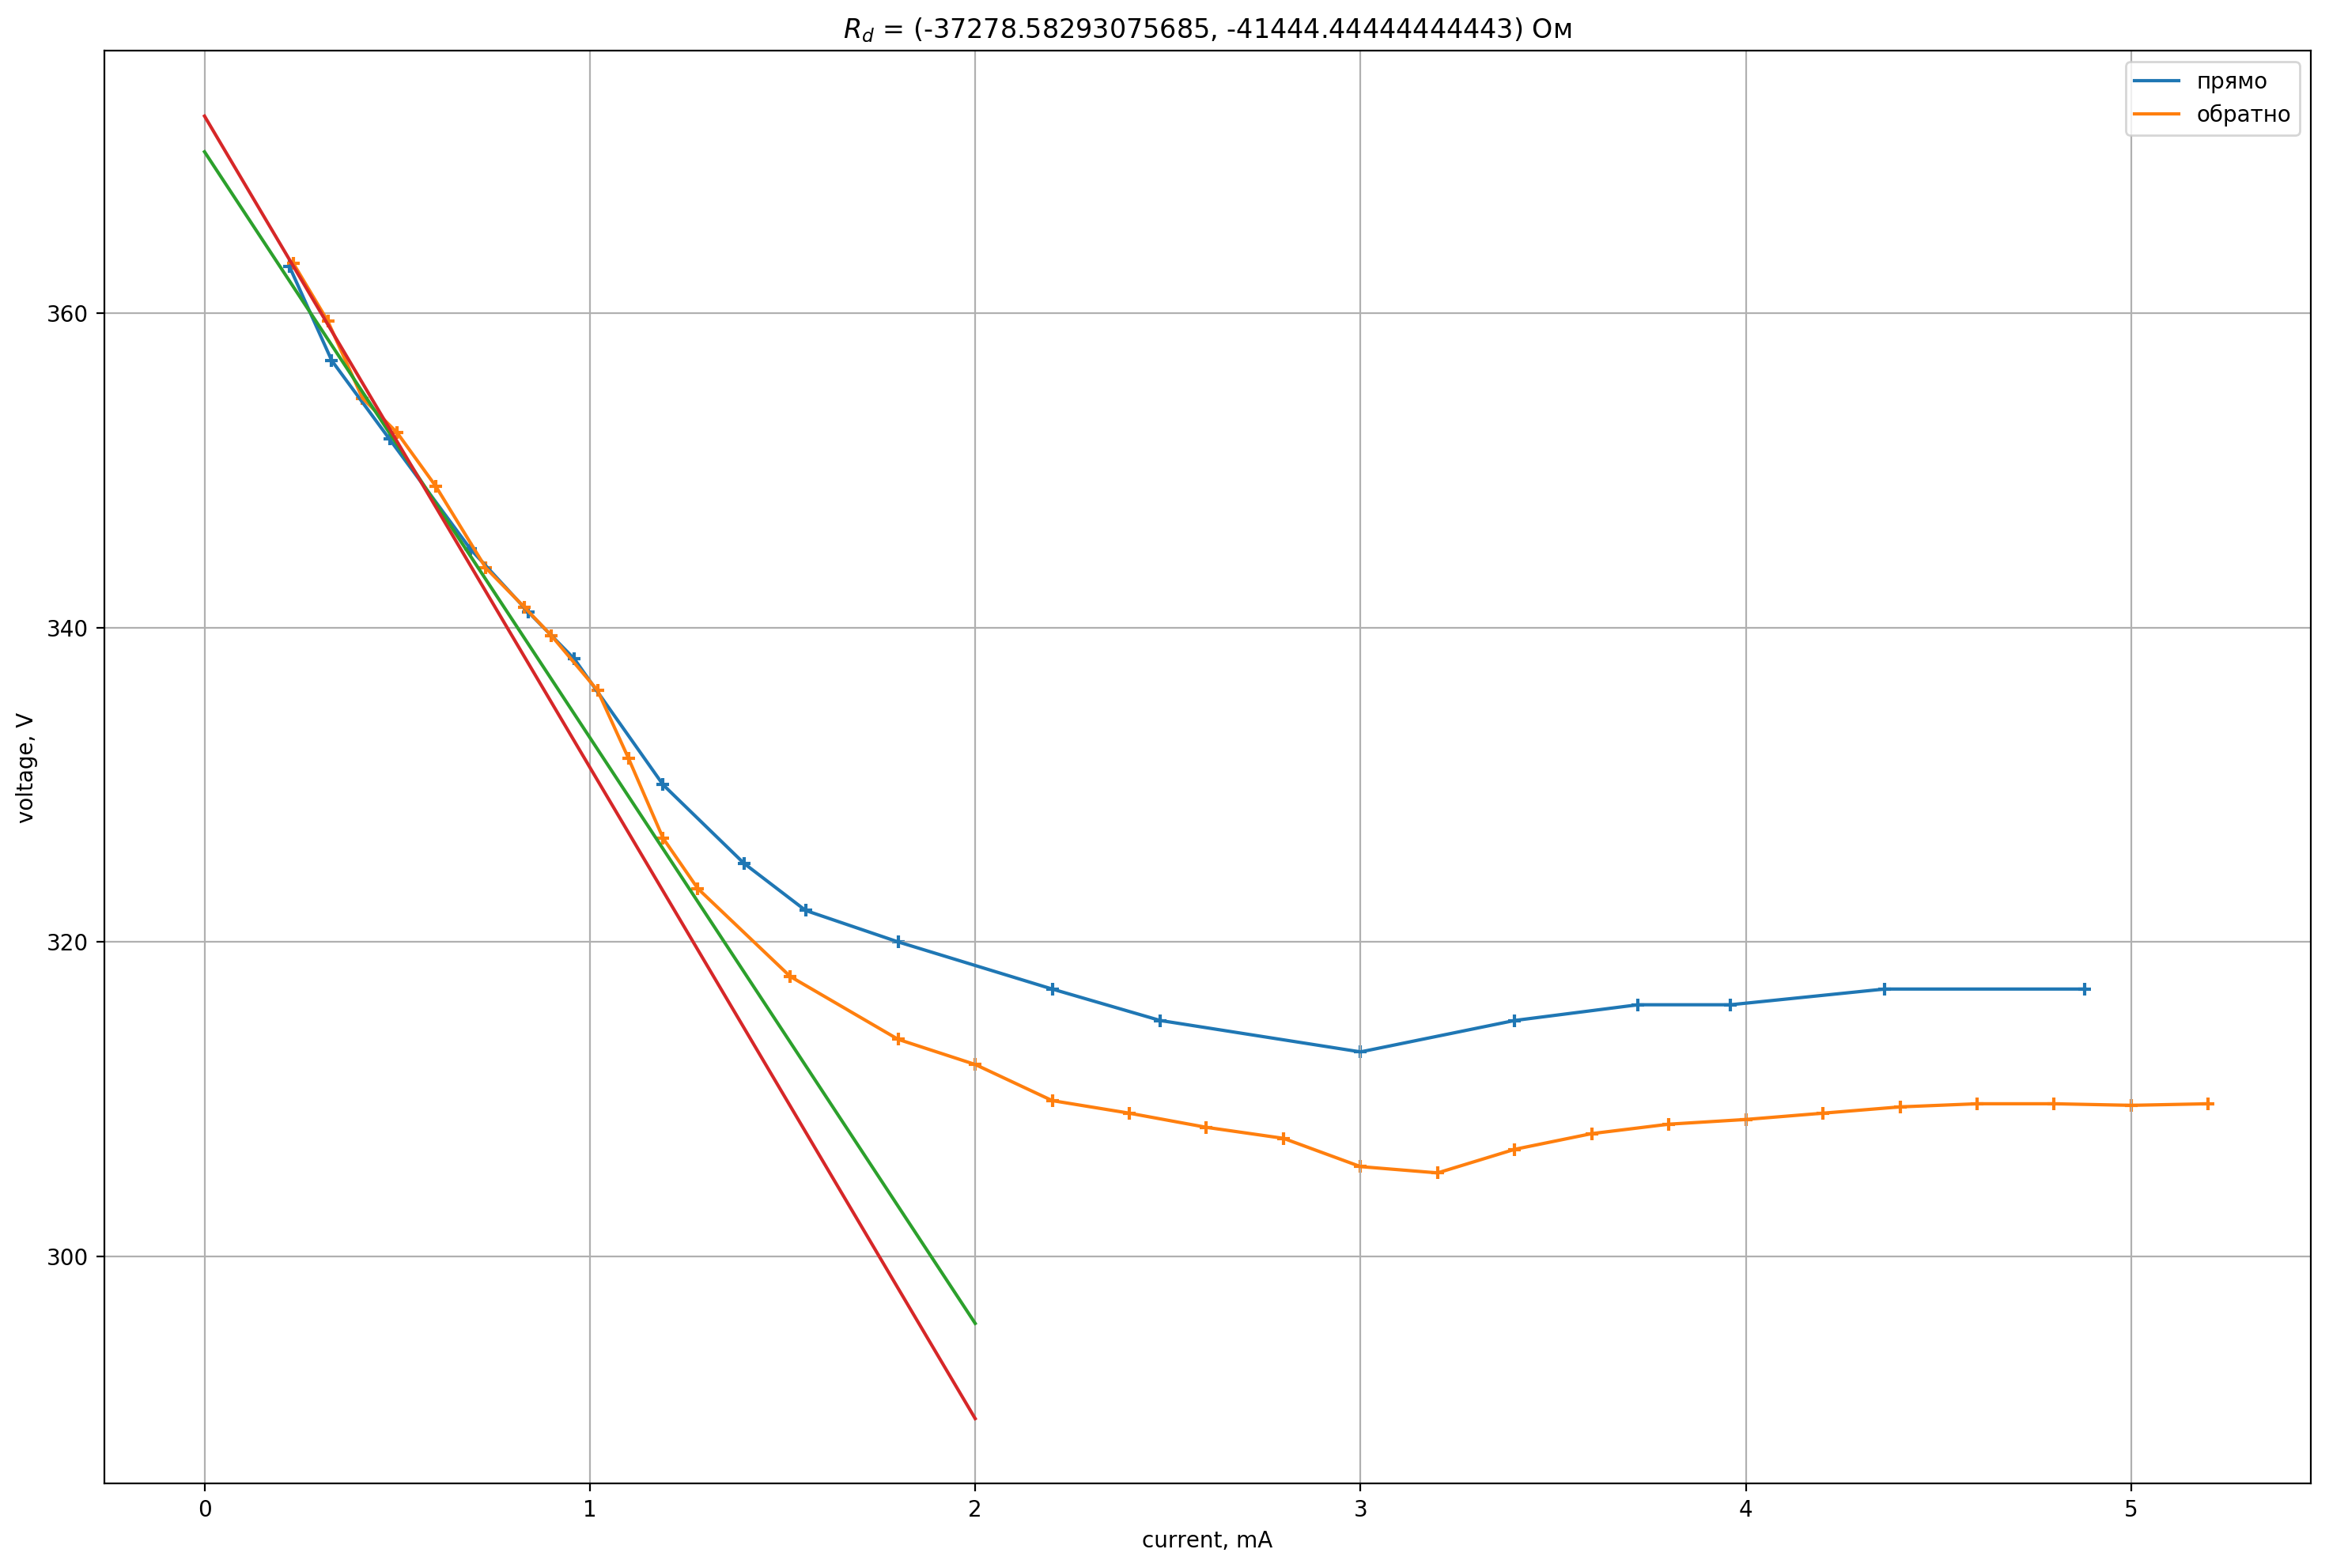

In [180]:
x = d1['I, мА']
y = d1['U, В']
x_1 = d1_1['I, мА']
y_1 = d1_1['U, В']
plt.figure(figsize=(18,12),dpi=200)
#lowess = sm.nonparametric.lowess(y, x, frac=0.1)
plt.scatter(x, y, marker='+')
plt.plot(x, y, label = "прямо")
plt.scatter(x_1, y_1, marker='+')
plt.plot(x_1, y_1, label = 'обратно')
plt.ylabel("voltage, V")
plt.xlabel("current, mA")
plt.legend()




k_1, b_1 = mnkGP(x[:4], y[:4])
k_2, b_2 = mnkGP(x_1[:4], y_1[:4])

x_tan = np.linspace(0,2,10)
y_tan_1 = k_1*x_tan + b_1
y_tan_2 = k_2*x_tan + b_2
plt.plot(x_tan,y_tan_1)
plt.plot(x_tan,y_tan_2)

plt.title(f"$R_d$ = {k_1*10**3, k_2*10**3} Ом")
#plt.scatter(lowess[:, 0], lowess[:, 1])
plt.grid(True)
plt.show()

### Определение максимального дифференциального сопротивления разряда

In [208]:
R_d=[-37278.4,-41444.4]
R_d_mse=(R_d[0]-R_d[1]) 
print(f"R_d={round(np.array(R_d).mean(),1)}+-{R_d_mse}")

R_d=-39361.4+-4166.0


### Построение семейства зондовых характеристик

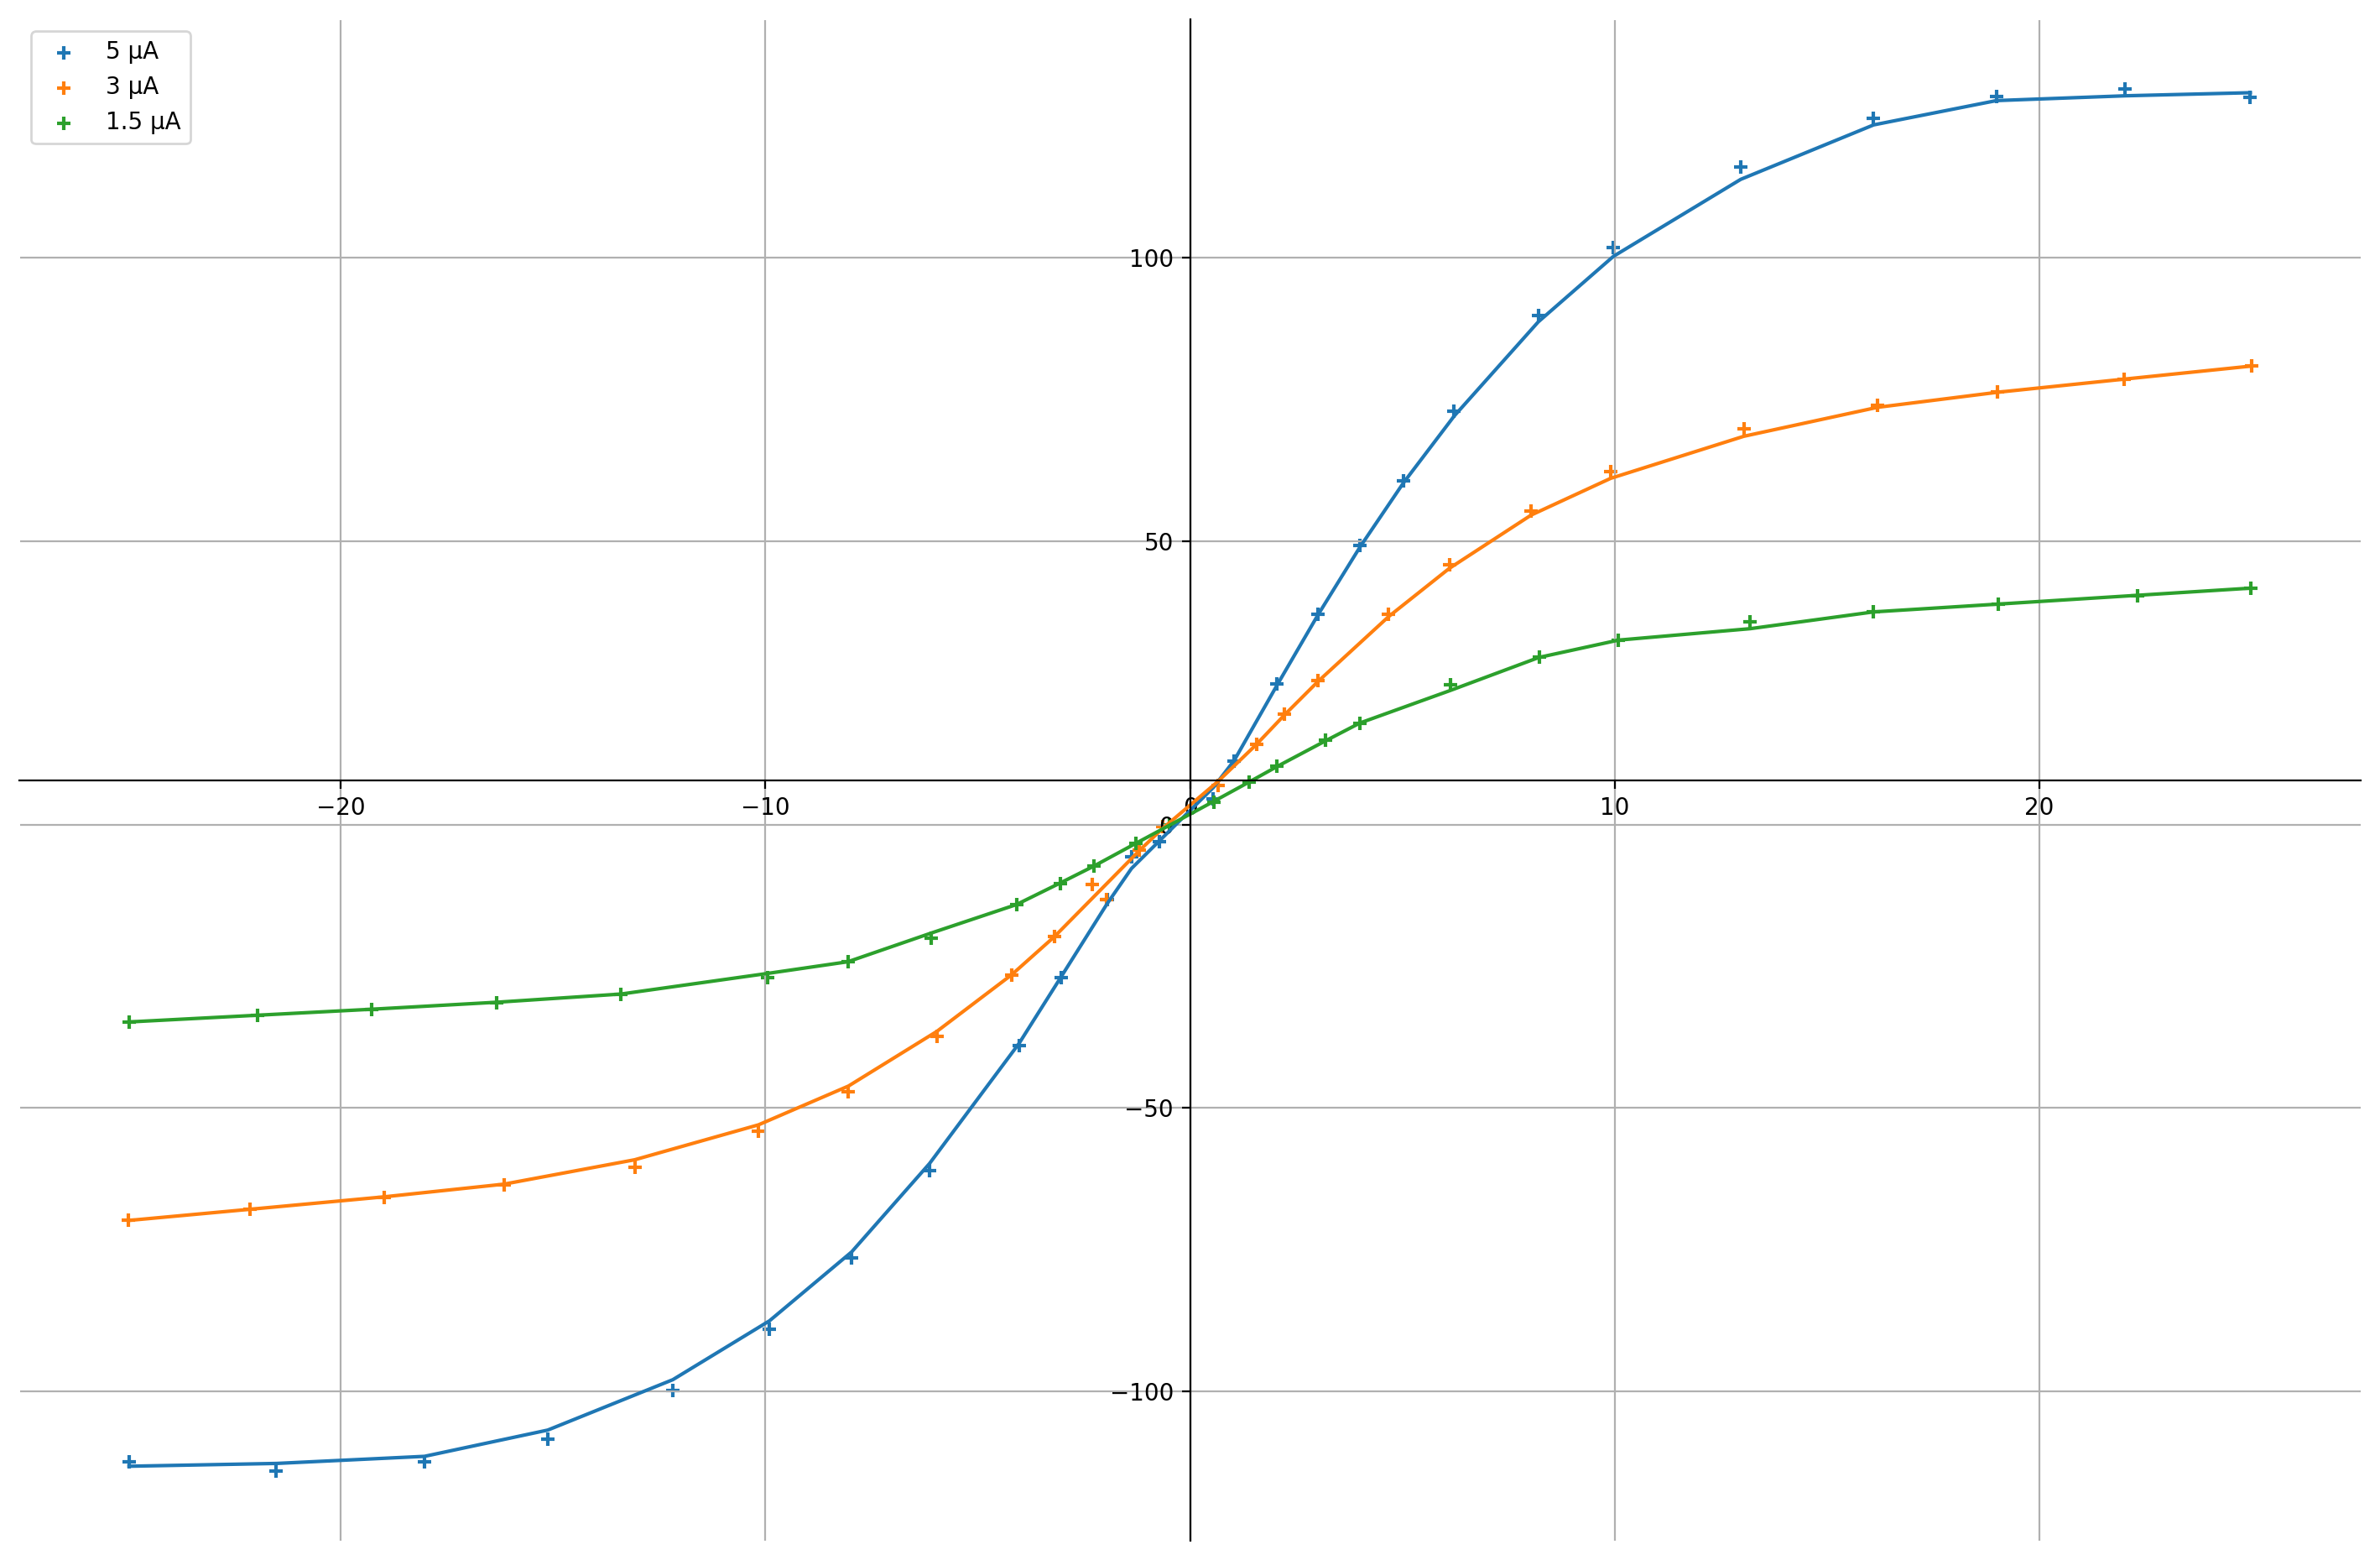

In [182]:
y_1 = d2_1['I, мкА']
x_1 = d2_1['U, В']
y_2 = d2_2['I, мкА']
x_2 = d2_2['U, В']
y_3 = d2_3['I, мкА']
x_3 = d2_3['U, В']
plt.figure(figsize=(18,12),dpi=200)
lowess_1 = sm.nonparametric.lowess(y_1, x_1, frac=0.2)
lowess_2 = sm.nonparametric.lowess(y_2, x_2, frac=0.2)
lowess_3 = sm.nonparametric.lowess(y_3, x_3, frac=0.2)
plt.scatter(x_1, y_1, marker='+', label = "5 µA")
plt.scatter(x_2, y_2, marker='+', label = "3 µA")
plt.scatter(x_3, y_3, marker='+', label = "1.5 µA")
#plt.xlabel("voltage, V")
#plt.ylabel("current, mA")
plt.legend()
plt.plot(lowess_1[:, 0], lowess_1[:, 1])
plt.plot(lowess_2[:, 0], lowess_2[:, 1])
plt.plot(lowess_3[:, 0], lowess_3[:, 1])
plt.grid(True)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

### Найдем $I_p$

In [183]:
import scipy as sp

k_1, b_1 = 0,-114
k_2, b_2 = 0,-75
k_3, b_3 = 0,-43

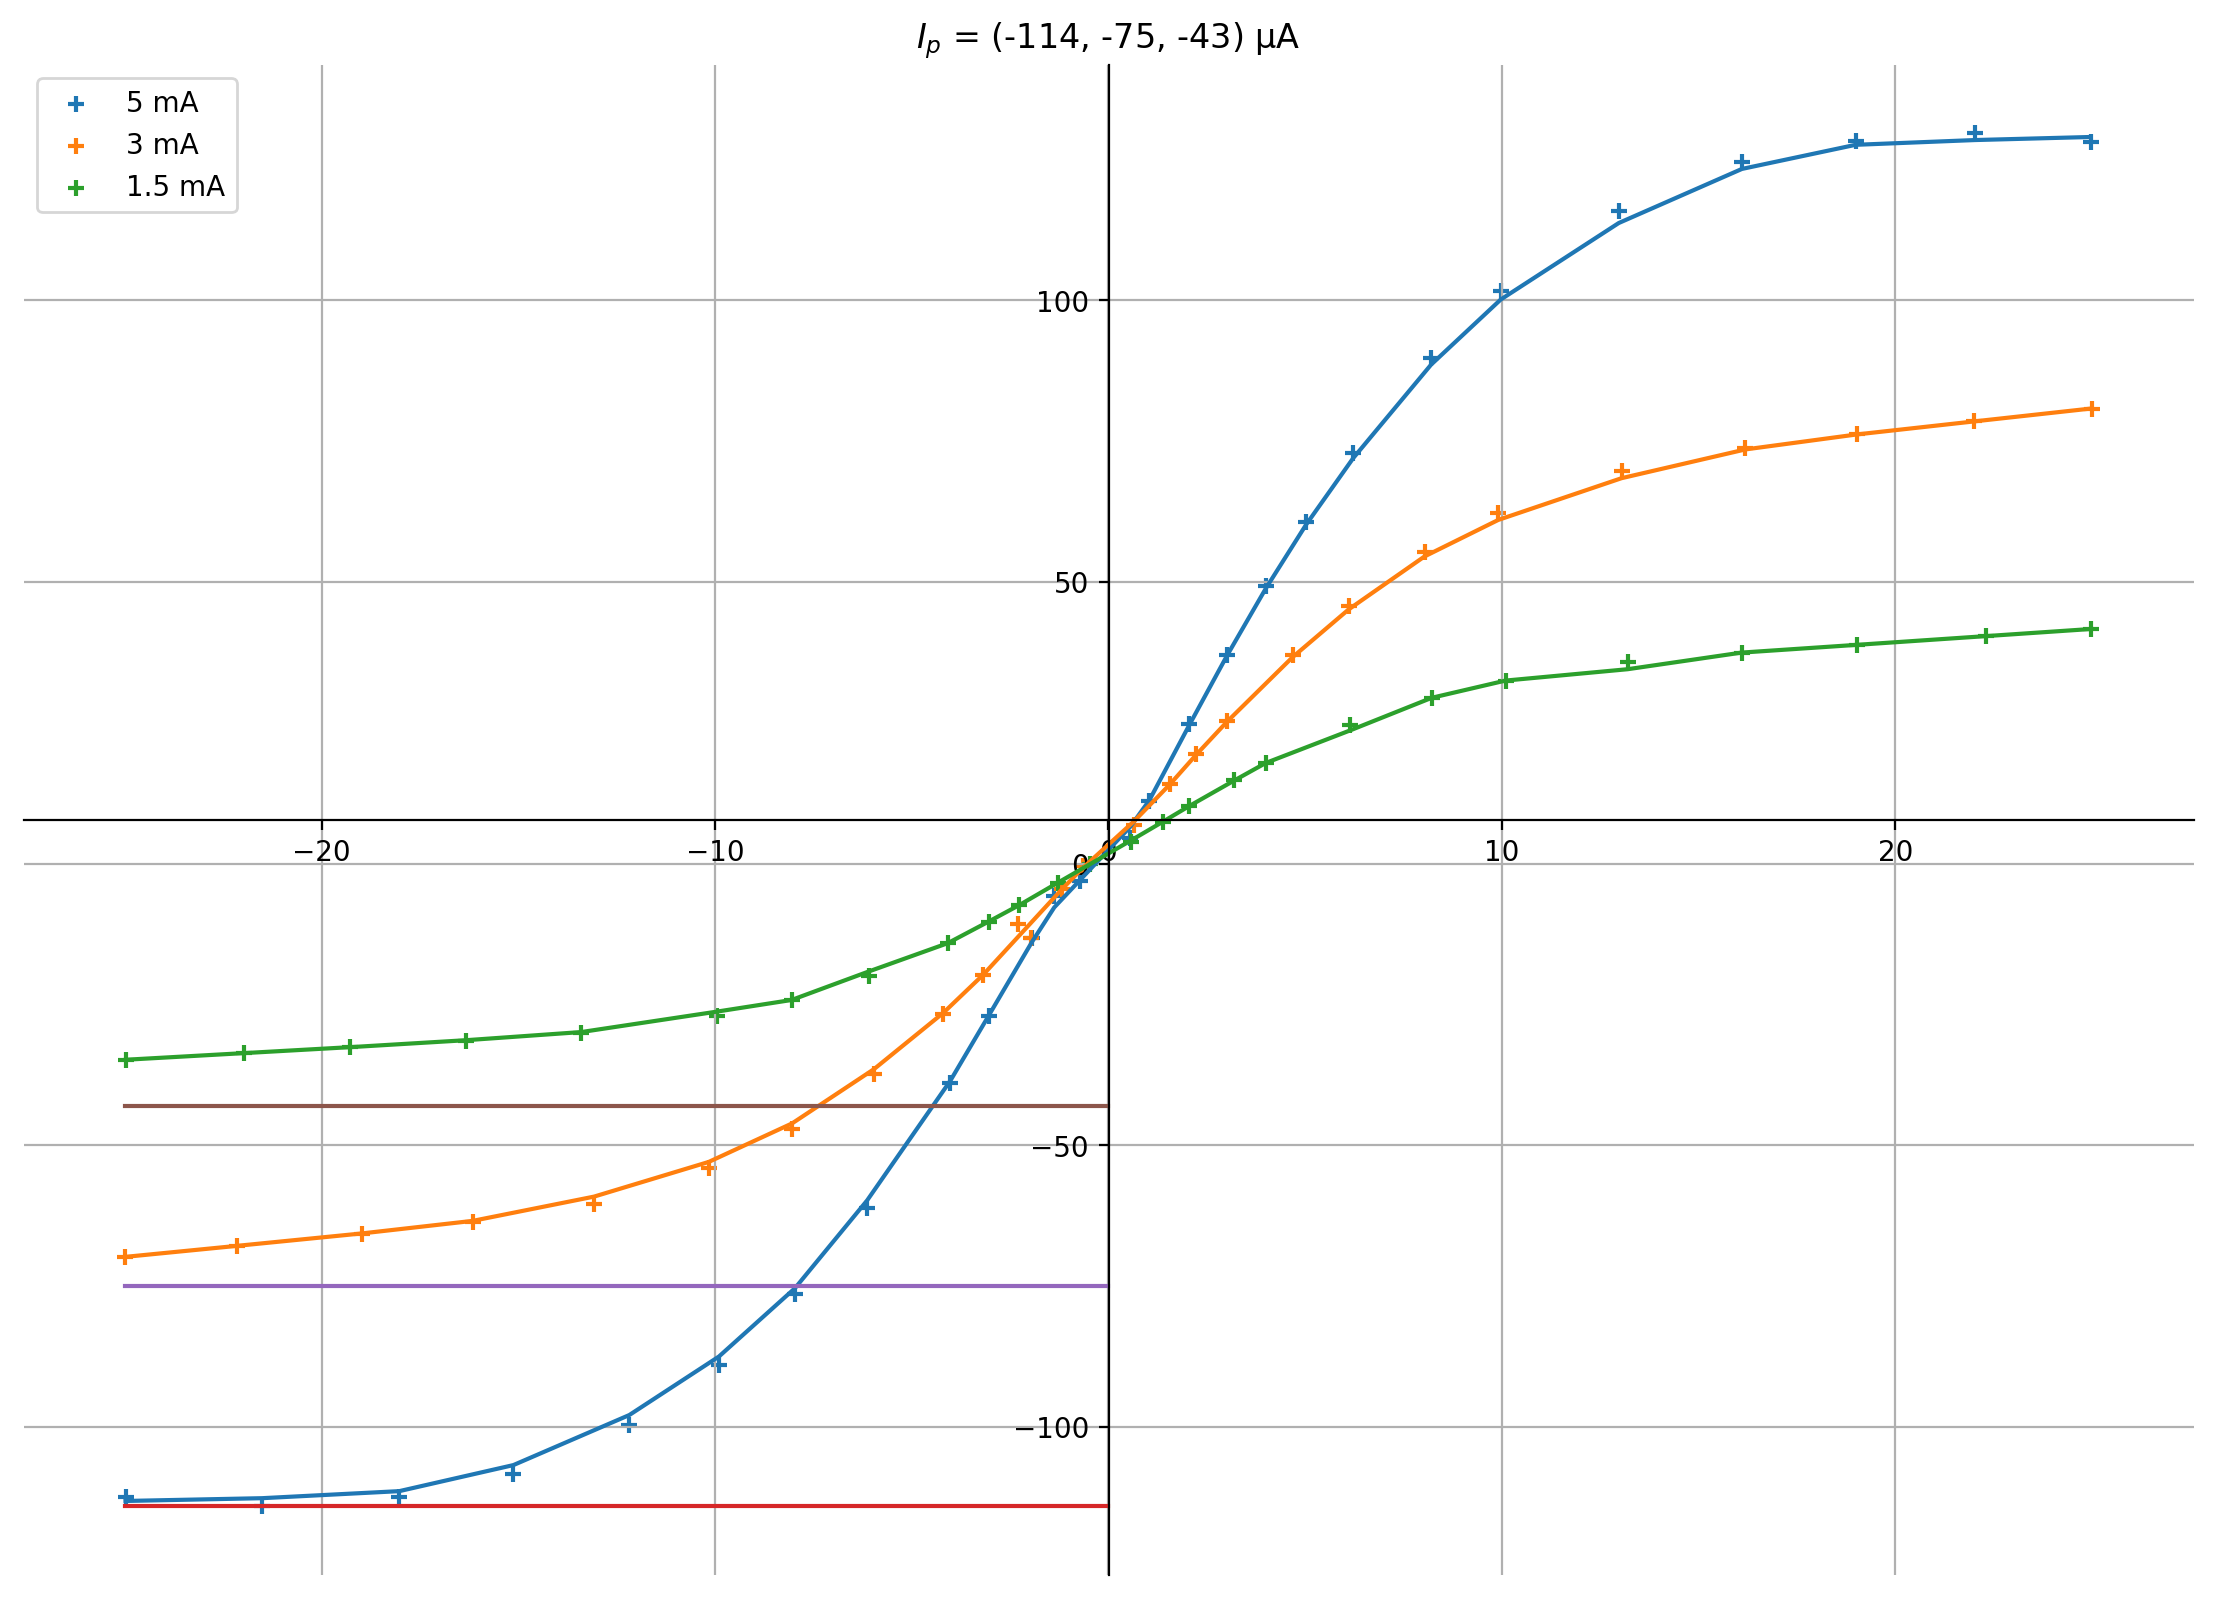

In [184]:
x_tan = np.linspace(-25,0,10)
y_tan_1 = k_1*x_tan + b_1
y_tan_2 = k_2*x_tan + b_2
y_tan_3 = k_3*x_tan + b_3
y_1 = d2_1['I, мкА']
x_1 = d2_1['U, В']
y_2 = d2_2['I, мкА']
x_2 = d2_2['U, В']
y_3 = d2_3['I, мкА']
x_3 = d2_3['U, В']
plt.figure(figsize=(14,10),dpi=200)
lowess_1 = sm.nonparametric.lowess(y_1, x_1, frac=0.2)
lowess_2 = sm.nonparametric.lowess(y_2, x_2, frac=0.2)
lowess_3 = sm.nonparametric.lowess(y_3, x_3, frac=0.2)
plt.scatter(x_1, y_1, marker='+', label = "5 mA")
plt.scatter(x_2, y_2, marker='+', label = "3 mA")
plt.scatter(x_3, y_3, marker='+', label = "1.5 mA")
#plt.xlabel("voltage, V")
#plt.ylabel("current, mA")
plt.legend()
plt.plot(lowess_1[:, 0], lowess_1[:, 1])
plt.plot(lowess_2[:, 0], lowess_2[:, 1])
plt.plot(lowess_3[:, 0], lowess_3[:, 1])
plt.plot(x_tan, y_tan_1)
plt.plot(x_tan, y_tan_2)
plt.plot(x_tan, y_tan_3)
plt.grid(True)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title(f"$I_p$ = {b_1, b_2, b_3} µA")
plt.show()
I_i=np.array([b_1,b_2,b_3])

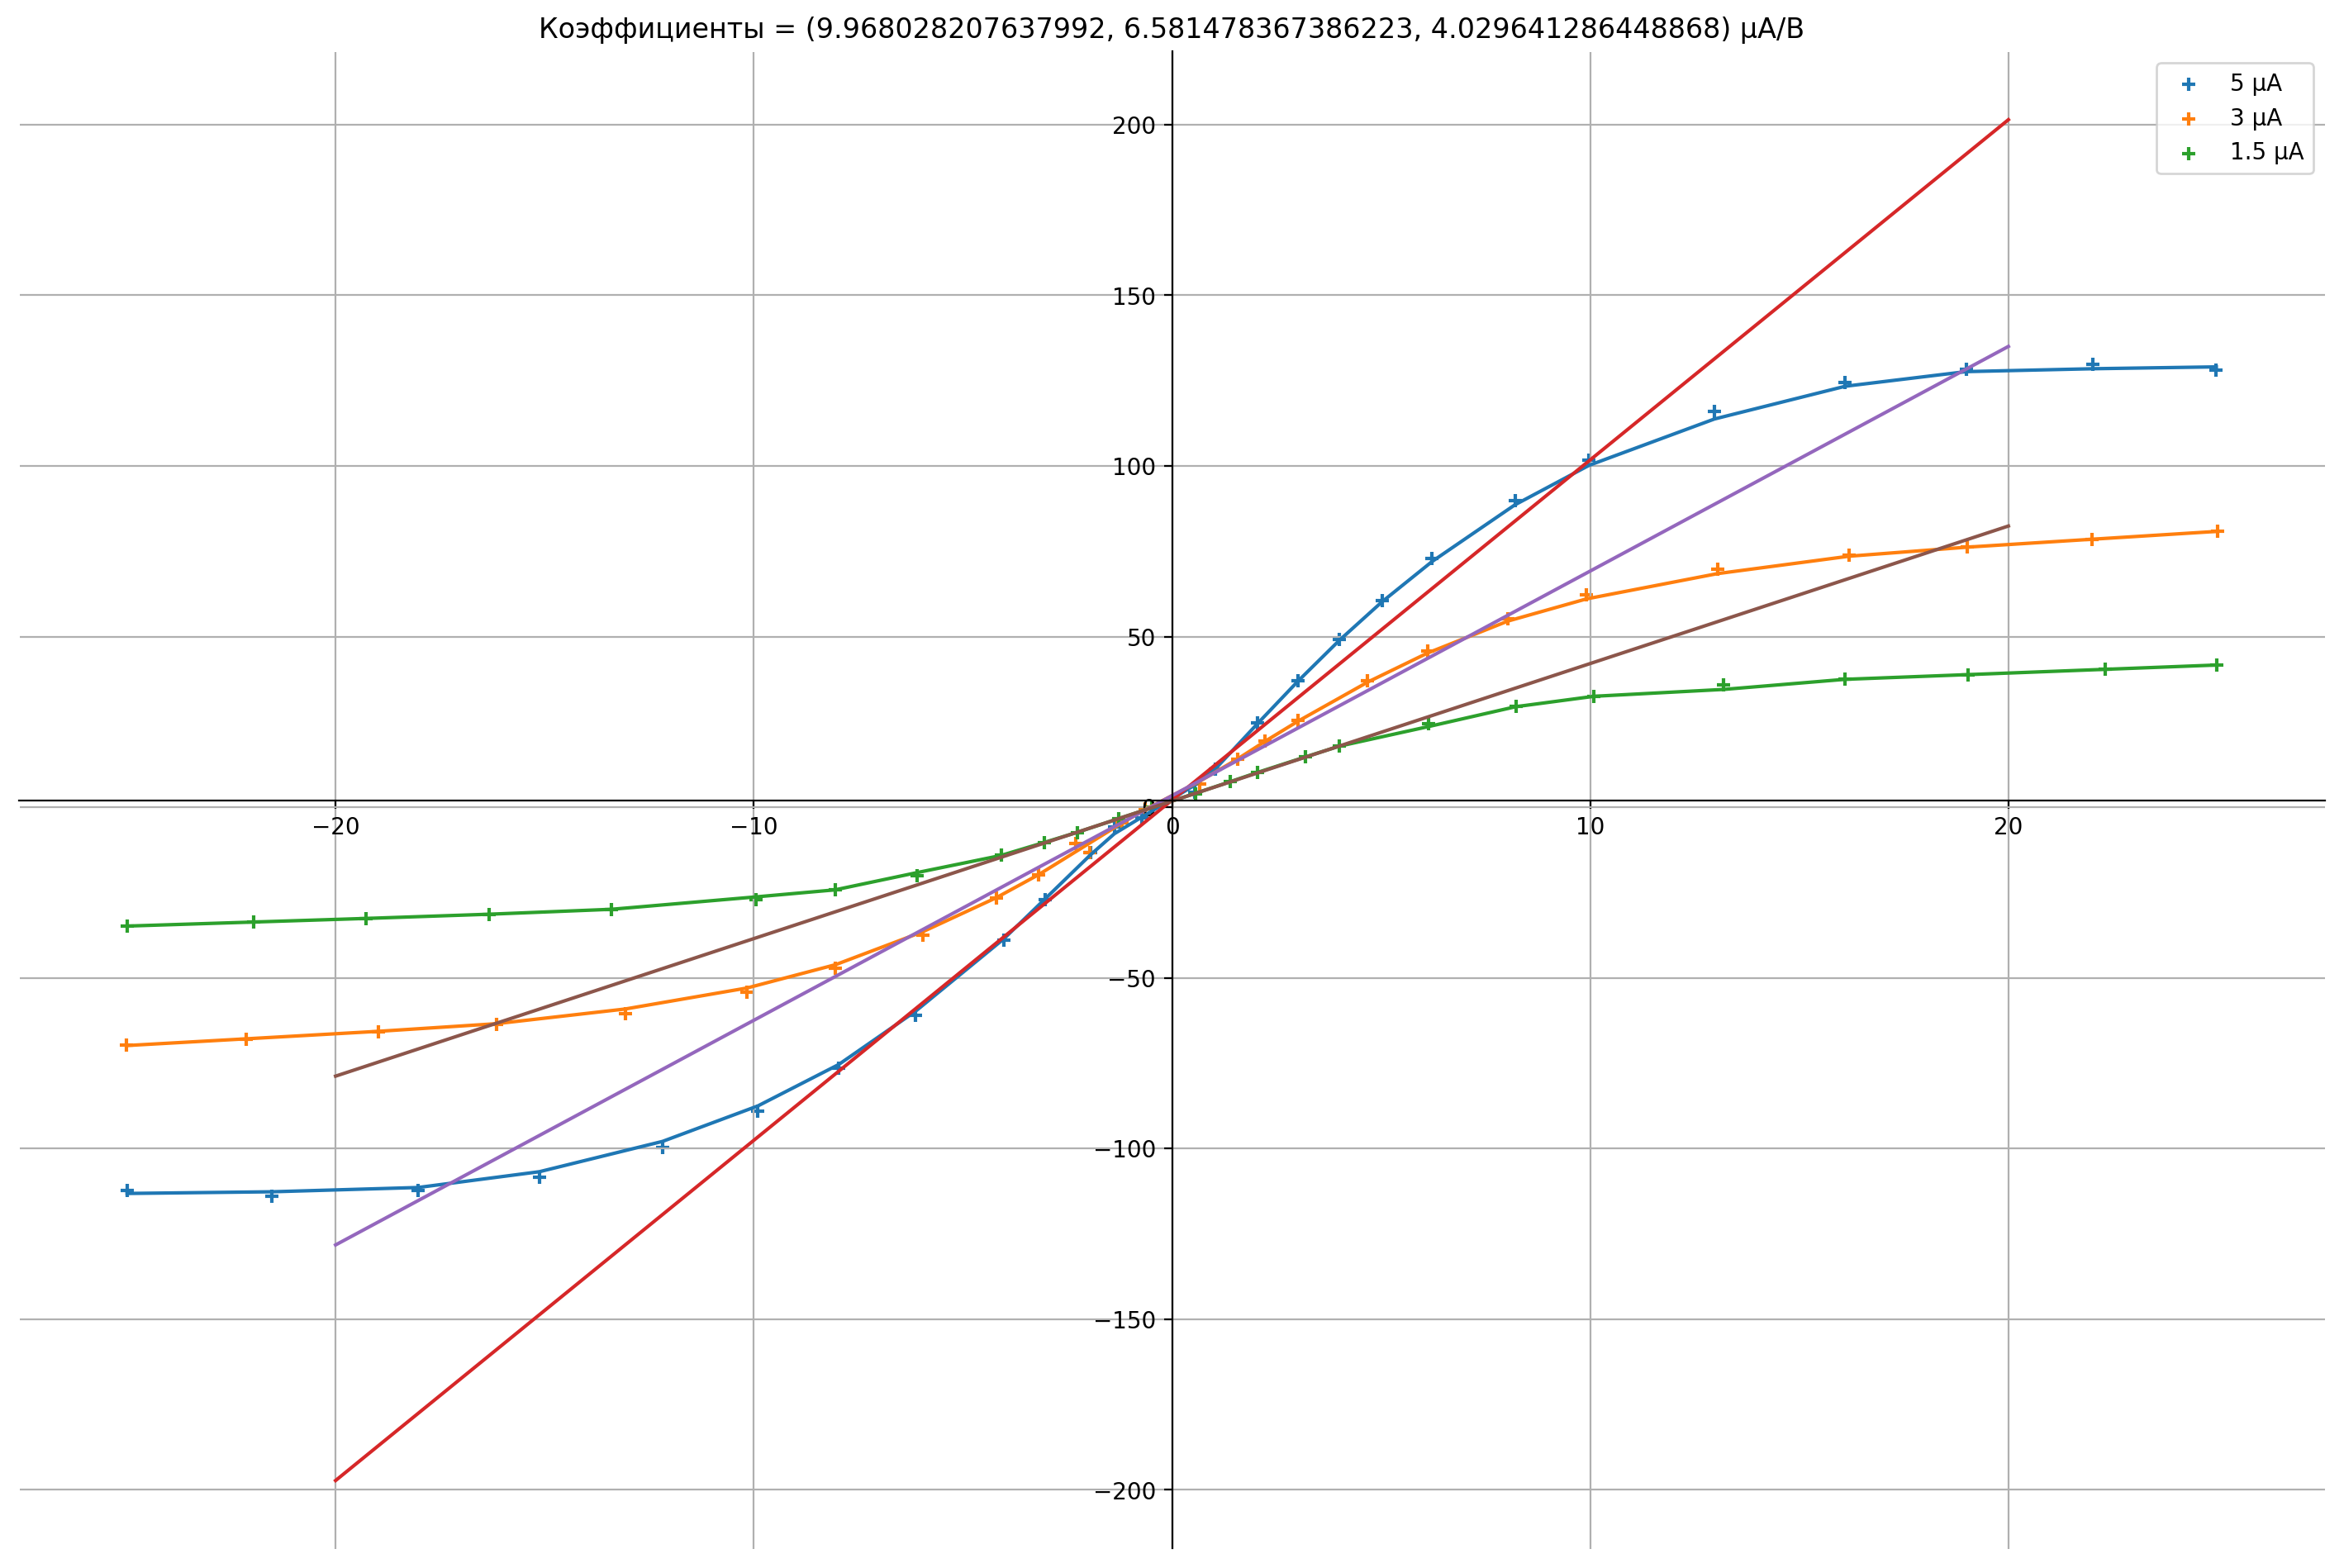

[9.96802821 6.58147837 4.02964129] [2.34006394 0.52016232 0.08321272]


In [185]:
y_1 = d2_1['I, мкА']
x_1 = d2_1['U, В']
y_2 = d2_2['I, мкА']
x_2 = d2_2['U, В']
y_3 = d2_3['I, мкА']
x_3 = d2_3['U, В']


k_1, b_1 = mnkGP(x_1[-15:-11], y_1[-15:-11])
k_2, b_2 = mnkGP(x_2[-15:-11], y_2[-15:-11])
k_3, b_3 = mnkGP(x_3[-15:-11], y_3[-15:-11])

k_1_, b_1_ = mnkGP(x_1[-15:-12], y_1[-15:-12])
k_2_, b_2_ = mnkGP(x_2[-15:-12], y_2[-15:-12])
k_3_, b_3_ = mnkGP(x_3[-15:-12], y_3[-15:-12])



x_tan = np.linspace(-20,20,10)
y_tan_1 = k_1*x_tan + b_1
y_tan_2 = k_2*x_tan + b_2
y_tan_3 = k_3*x_tan + b_3
plt.figure(figsize=(18,12),dpi=200)

lowess_1 = sm.nonparametric.lowess(y_1, x_1, frac=0.2)
lowess_2 = sm.nonparametric.lowess(y_2, x_2, frac=0.2)
lowess_3 = sm.nonparametric.lowess(y_3, x_3, frac=0.2)
plt.scatter(x_1, y_1, marker='+', label = "5 µA")
plt.scatter(x_2, y_2, marker='+', label = "3 µA")
plt.scatter(x_3, y_3, marker='+', label = "1.5 µA")
#plt.xlabel("voltage, V")
#plt.ylabel("current, mA")
plt.legend()
plt.plot(lowess_1[:, 0], lowess_1[:, 1])
plt.plot(lowess_2[:, 0], lowess_2[:, 1])
plt.plot(lowess_3[:, 0], lowess_3[:, 1])
plt.plot(x_tan, y_tan_1)
plt.plot(x_tan, y_tan_2)
plt.plot(x_tan, y_tan_3)
plt.grid(True)
ax = plt.gca()
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title(f"Коэффициенты = {k_1, k_2, k_3} µA/B")

plt.show()
K=np.array([k_1,k_2,k_3])
K_mse=K-np.array([k_1_,k_2_,k_3_])

#K_mse=np.array([mse_1,mse_2,mse_3])
print(K,K_mse)

### Нахождение энергии в электрон-вольтах
$kT_e=\frac{eI_{in}}{2\frac{dI}{dU}}$

In [186]:
W=-I_i/(2*K)
W_mse=W*K_mse/K
print(I_i,W,K,W_mse)

[-114  -75  -43] [5.71828237 5.69780799 5.33546251] [9.96802821 6.58147837 4.02964129] [1.34240655 0.45032208 0.11017812]


### Определение из формулы концентрации электронов

$I_{in}=0.4n_eeS\sqrt(\frac{2kT_e}{m_i})$
$n_e=\frac{I_{in}\sqrt(m_i)}{0.4eS\sqrt(2kT_e)}$

In [187]:
#N_e=((-I_i*3*10**3)*(22*1.66*10**(-24))**0.5)/((0.4*1.6*10**(-10)*3))
N_e=(-I_i/(10**6)*(22*1.66*10**(-27))**(0.5))/(1.6*10**(-19)*(0.4*3.14*0.2*10**(-6)*5.2)*(2*W*1.6*10**(-19))**(0.5))
N_e_mse=N_e*W_mse/W
print(N_e,N_e_mse)

[7.70583112e+16 5.07872611e+16 3.00905311e+16] [1.80899744e+16 4.01393397e+15 6.21374116e+14]


## Графики 

[66298.92607156 66061.54186424 61860.43486231]


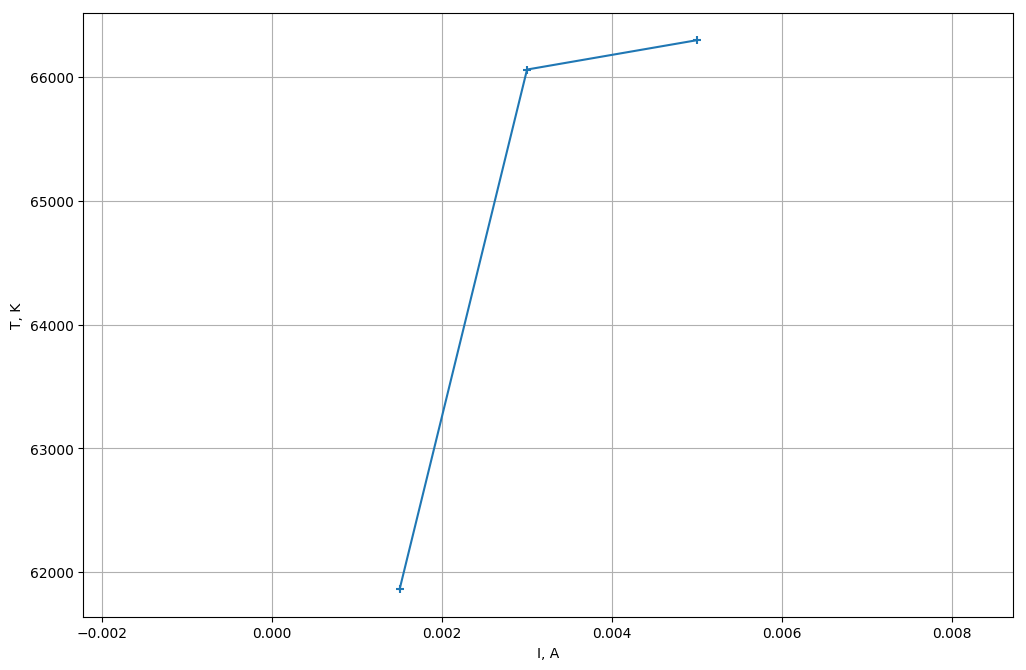

In [188]:
T_e=W*1.6*10**(-19)/(1.38*10**(-23))
I_p=np.array([5*10**(-3),3*10**(-3),1.5*10**(-3)])
print(T_e)
plt.figure(figsize=(12,8),dpi=100)
plt.ylabel('T, K')
plt.xlabel('I, A')
plt.scatter(I_p,T_e, marker='+')
plt.grid(True)
plt.plot(I_p,T_e)
plt.show()

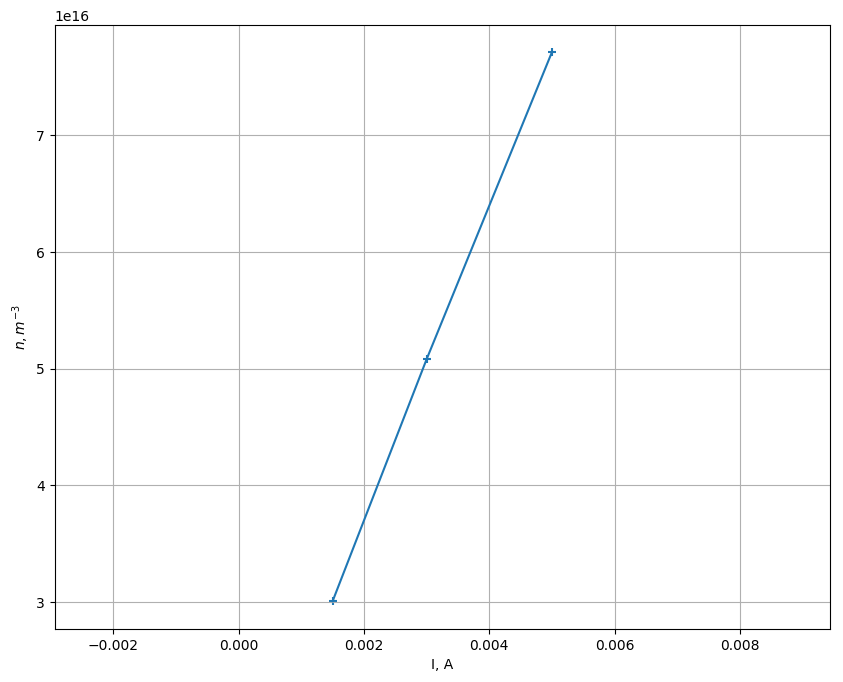

In [189]:
plt.figure(figsize=(10,8),dpi=100)
plt.ylabel('$n, m^{-3}$')
plt.xlabel('I, A')
plt.scatter(I_p,N_e, marker='+')
plt.grid(True)
plt.plot(I_p,N_e)

## Нахождение омеги
$\omega=\sqrt(\frac{ ne^2}{\epsilon_0 m})$

In [190]:
omega=(N_e*10**(5)*(1.6)**2/(8.85*9.1))**0.5
omega_mse=omega*N_e/N_e_mse
print(N_e,omega,omega_mse)

[7.70583112e+16 5.07872611e+16 3.00905311e+16] [1.56508307e+10 1.27058887e+10 9.78008384e+09] [6.66682306e+10 1.60764301e+11 4.73608265e+11]


### Оценка дебаевского радиуса
$r_d=\sqrt(\frac{kT_i}{4\pi ne^2})$

In [191]:
P=2*136000*10**(-3)
r_d=1.38*10**(-23)*300/(1.6*10**(-19))*(1/(4*3.14*P))**0.5
print(r_d)

0.0004426914015929211


### Cреднее число ионов в дебаевской сфере
$N_d=\frac{4}{3}\pi r_d^3 n_i$

In [192]:
N_d=4/3*3.14*N_e*r_d**3
N_d_mse=N_d*N_e_mse/N_e
print(N_d,N_d_mse)


[27989241.63577863 18447029.29471966 10929530.29523779] [6570669.10749726 1457947.44261881  225696.48887154]


# Погрешности

$$ \delta R = 300Om$$
$$ \delta kT_e = kT_e(\frac{\delta \tan{\alpha}}{\tan{\alpha}}+\frac{\delta I_p}{I_p})$$
$$ \delta n_e = n_e(\frac{\delta I_n}{I_n} + \frac{\delta kT_e}{kT_e})$$
$$ \delta \omega = \omega (\frac{\delta n_e}{n_e}) $$
$$ \delta r_d = r_d (\frac{\delta T}{T}) $$
$$ \delta N_d = N_d (\frac{2\delta r_d}{r_d}+\frac{\delta n_i}{n_i}) $$

In [209]:
#%%latex
cm1=np.array([(R_d[0]+R_d[1])/2 for i in range(0,3)])
cm2=np.array([5,3,1.5])
cm3=W
cm4=N_e
cm5=omega
cm6=np.array([r_d for i in range(0,3)])
cm7=N_d
alpha=N_e/(P/(1.38*10**(-23)*300))
cm8=alpha

cm1_mse=np.array([R_d_mse for i in range(0,3)])
cm3_mse=W_mse
cm4_mse=N_e_mse
cm5_mse=omega_mse
cm7_mse=N_d_mse
alpha_mse=alpha*N_e_mse/N_e
cm8_mse=alpha_mse

F={'$R_{max}$, Ом':cm1.round(2),'$\delta R_{max}$, Ом':cm1_mse.round(2),'$I_p$ мА':cm2.round(2),'$kT_e$, эВ':cm3.round(2),'$\delta kT_e$, эВ':cm3_mse.round(2),'$n_e$,$m^{-3}$':cm4.round(2),
   '$\delta n_e$,$m^{-3}$':cm4_mse.round(2),'$W_p$,$c^{-1}$':cm5.round(2),'$\delta W_p$,$c^{-1}$':cm5_mse.round(2).round(2),'$r_d$,m':cm6.round(2),'$N_d$':cm7.round(2),
   '$\delta N_d$':cm7_mse.round(2),'alpha':cm8.round(8),'$\delta$ alpha':cm8_mse.round(8)}
pd.DataFrame(F)
#print(P)

,"$R_{max}$, Ом","$\delta R_{max}$, Ом",$I_p$ мА,"$kT_e$, эВ","$\delta kT_e$, эВ","$n_e$,$m^{-3}$","$\delta n_e$,$m^{-3}$","$W_p$,$c^{-1}$","$\delta W_p$,$c^{-1}$","$r_d$,m",$N_d$,$\delta N_d$,alpha,$\delta$ alpha
0,-39361.4,4166.0,5.0,5.72,1.34,7.705831e+16,1.808997e+16,1.565083e+10,6.666823e+10,0.0,27989241.64,6570669.11,1.170000e-06,2.800000e-07
1,-39361.4,4166.0,3.0,5.70,0.45,5.078726e+16,4.013934e+15,1.270589e+10,1.607643e+11,0.0,18447029.29,1457947.44,7.700000e-07,6.000000e-08
2,-39361.4,4166.0,1.5,5.34,0.11,3.009053e+16,6.213741e+14,9.780084e+09,4.736083e+11,0.0,10929530.30,225696.49,4.600000e-07,1.000000e-08
